In [138]:
#visualizing protostellar disks data from protostellar disk catalog

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

#from sort_functions import sort_spectral_class 
#from sort_functions import b, c
#from sort_functions import a
import importlib
from functions import sort_functions_visibility
importlib.reload(sort_functions_visibility)

from functions import sort_functions_astrometry
importlib.reload(sort_functions_astrometry)

from astropy import units as u
from astropy.coordinates import SkyCoord
from mw_plot import MWPlot

circumstellar_disks = pd.read_csv("data/circumstellardisks.csv")
data = pd.DataFrame(circumstellar_disks)
print(data )

                     Object Category Spec_Type R_band_mag  Distance_pc  \
0    2MASSI J1628137-243139       TT       NaN       17.7       140.00   
1                    49 Cet   Debris        A1        5.6        59.00   
2                    61 Vir   Debris       G7V        4.2         8.50   
3                    99 Her   Debris     F7+K4        4.7        15.60   
4      [MR81] H alpha 17 NE       TT       M2e       16.9       150.00   
5                    AA Tau       TT        M0       11.8       140.00   
6                    AB Aur      HAe       A0e        7.1       144.00   
7                 alpha CrB   Debris      A0 V        2.2        23.00   
8                  AS 205 A       TT        K0       12.8       128.00   
9                  AS 205 B       TT     K7+M0         14       128.00   
10                   AS 209       TT        K5       10.4       121.00   
11                   ASR 41       TT       NaN        NaN       316.00   
12                   AU Mic   Debris  

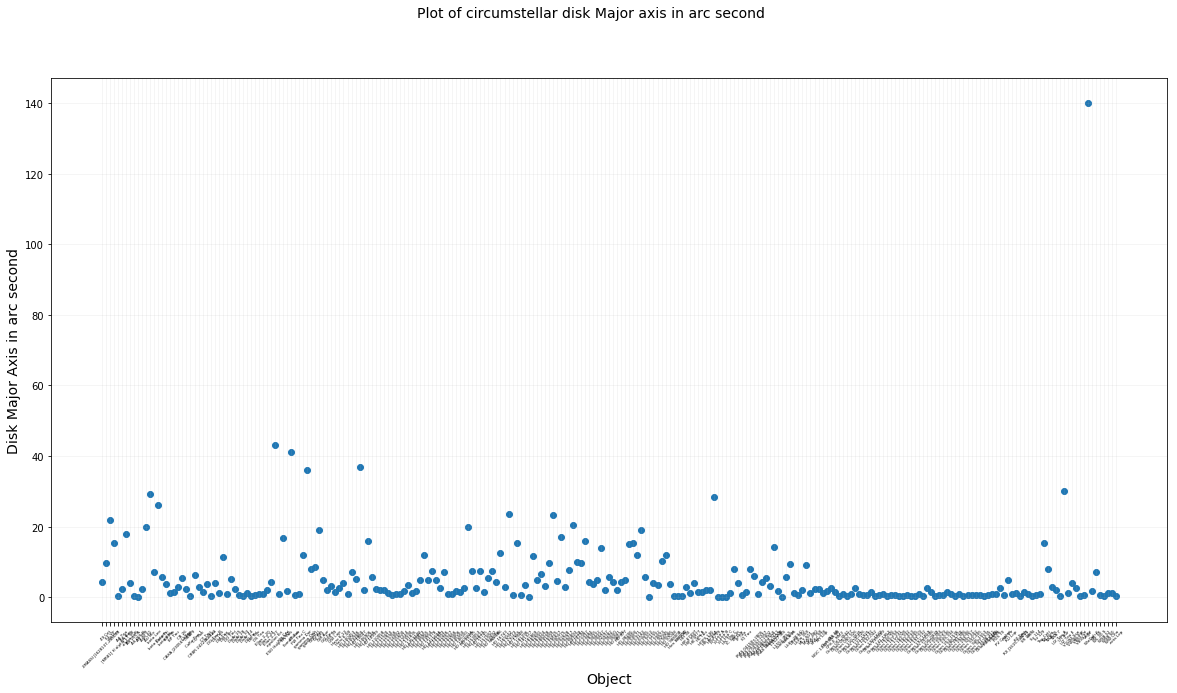

Disc with largest Major Axis Angular Size: Vega Size: 140 arcsec
Disc with smallest Major Axis Angular Size: HT Lup B Size: 0.032 arcsec

Mean major axis: 5.56395652173913
Median major axis: 2.14


In [139]:
#a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter(data["Object"], data["Disk_Major_Axis"])

fig.suptitle('Plot of circumstellar disk Major axis in arc second', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Major Axis in arc second', fontsize=14)

plt.yticks(np.arange(0, 150, step=20))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

#So the largest apparent disk:
print("Disc with largest Major Axis Angular Size:" + " " + str(data.loc[data['Disk_Major_Axis'].idxmax()][0]) + " Size: " + str(str(data.loc[data['Disk_Major_Axis'].idxmax()][5])*u.arcsec))
#Smallest apparent disk:
print("Disc with smallest Major Axis Angular Size:" + " " + str(data.loc[data['Disk_Major_Axis'].idxmin()][0]) + " Size: " + str(str(data.loc[data['Disk_Major_Axis'].idxmin()][5])*u.arcsec))
#Smallest apparent disk:
print("\nMean major axis: " + str(np.mean(np.array(data['Disk_Major_Axis'])) ))
print("Median major axis: " + str(np.median(np.array(data['Disk_Major_Axis'])) ))


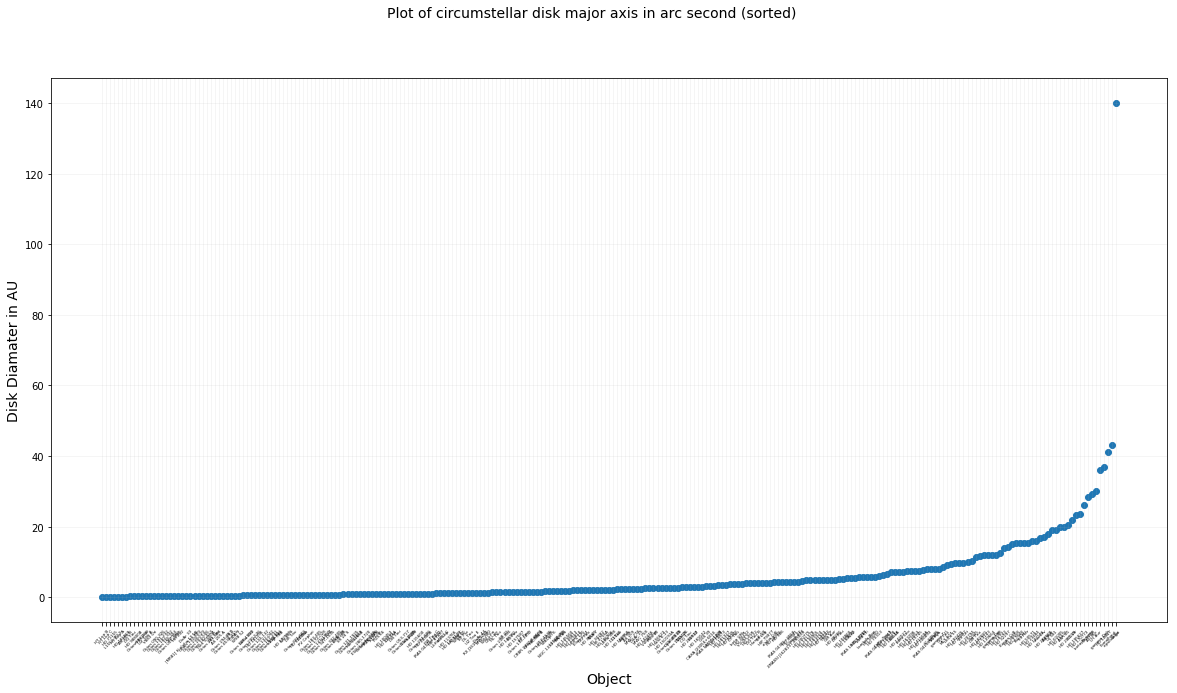

In [140]:
#Sorted Angular Size
sorted_objects = data.sort_values(by ='Disk_Major_Axis')
fig = plt.figure(figsize=(20,10))
plt.scatter(sorted_objects["Object"], sorted_objects["Disk_Major_Axis"])

fig.suptitle('Plot of circumstellar disk major axis in arc second (sorted)', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 150, step=20))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

In [141]:
#cat_magnitude_diameter = sort_functions_astrometry.cat_mag_diam(data)
cat_magnitude_diameter = sort_functions_visibility.cat_mag_diam(data, 'Disk_Major_Axis')

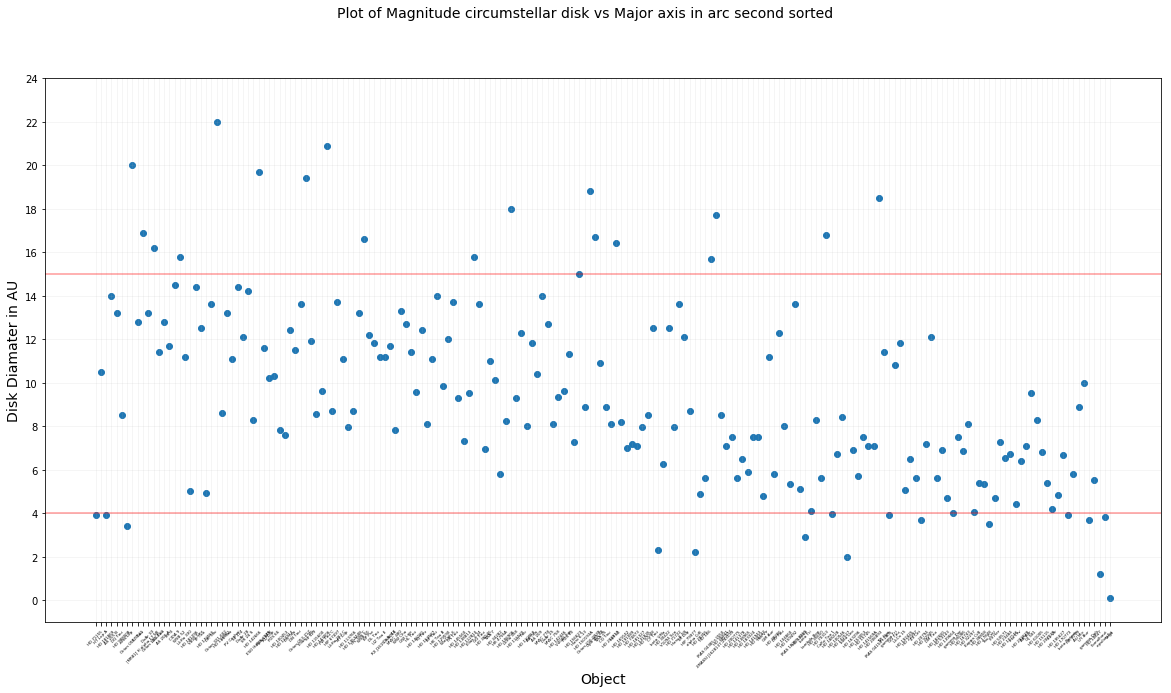

Length Array: 194


In [142]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(cat_magnitude_diameter["Object"], cat_magnitude_diameter['R_band_mag'])

fig.suptitle('Plot of Magnitude circumstellar disk vs Major axis in arc second sorted', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
#bracket
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 25, step=2))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.savefig("test.png")

plt.show()

#print("Highest Magnitude: " + str( np.array( cat_magnitude_diameter["R_band_mag"])))
print("Length Array: " + str( len(np.array( cat_magnitude_diameter["R_band_mag"]))))

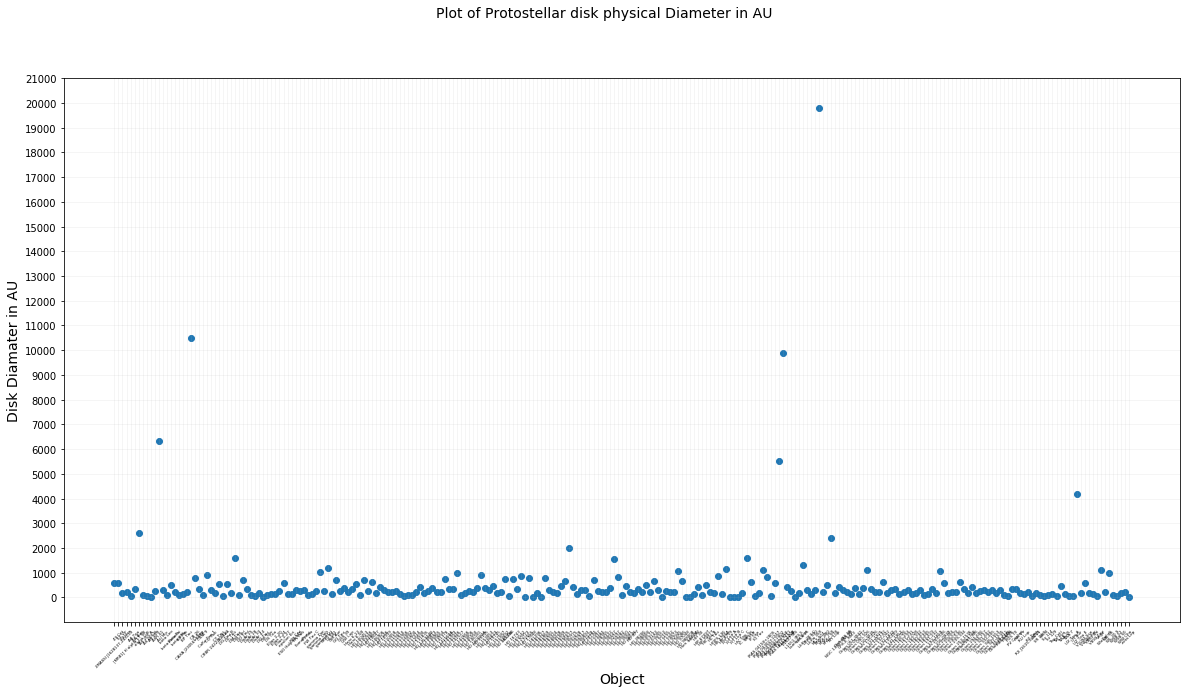

Disc with largest physical Diameter: M17-SO1 19800 AU
Disc with smallest physical Diameter: HD 71155 3.8 AU

Mean disk physical Diameter: 567.3088537549407
Median median physical Diameter: 236.0


In [155]:
#a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter(data["Object"], data["Disk_Diameter_AU"])

fig.suptitle('Plot of Protostellar disk physical Diameter in AU', fontsize=14)

#plt.axhline(y=320, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

#So the largest apparent disk:
print("Disc with largest physical Diameter:" + " " + str(data.loc[data['Disk_Diameter_AU'].idxmax()][0]) + " " + str(str(data.loc[data['Disk_Diameter_AU'].idxmax()][6])*u.AU))
#Smallest apparent disk:
print("Disc with smallest physical Diameter:" + " " + str(data.loc[data['Disk_Diameter_AU'].idxmin()][0]) + " " + str(str(data.loc[data['Disk_Diameter_AU'].idxmin()][6])*u.AU))

print("\nMean disk physical Diameter: " + str(np.mean(np.array(data['Disk_Diameter_AU'])) ))
print("Median median physical Diameter: " + str(np.median(np.array(data['Disk_Diameter_AU'])) ))

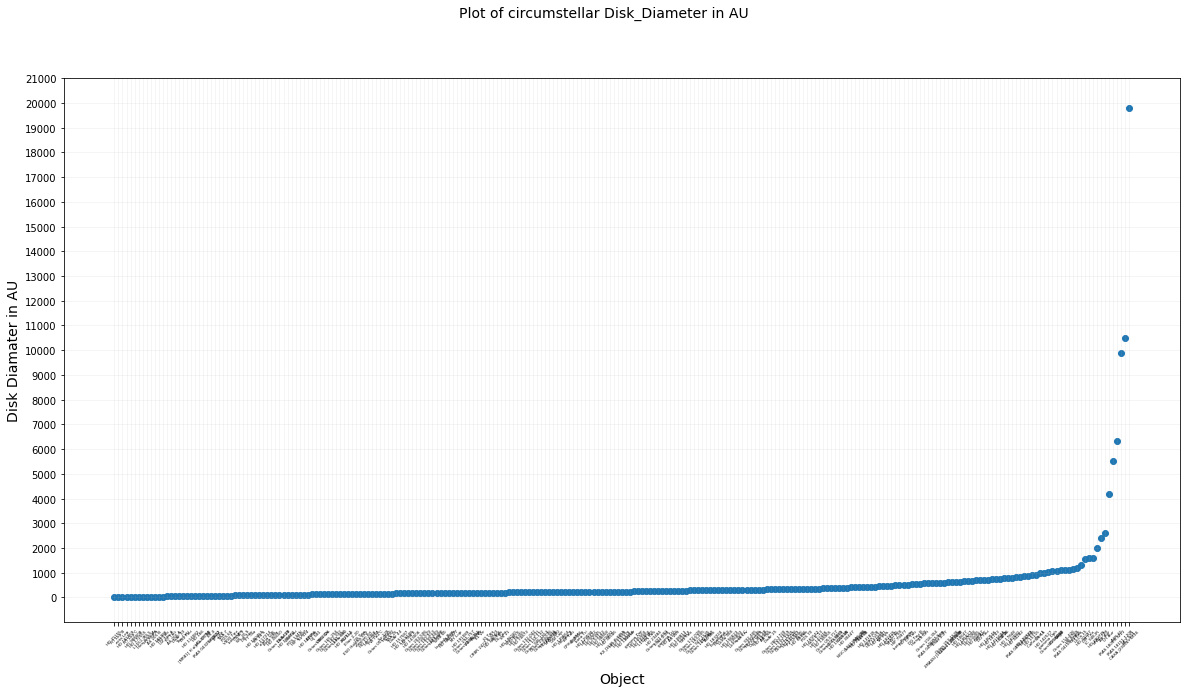

In [151]:
#magnitudes_sorted = sorted_objects.dropna()
sorted_objects = data.sort_values(by ='Disk_Diameter_AU')
fig = plt.figure(figsize=(20,10))
plt.scatter(sorted_objects["Object"], sorted_objects["Disk_Diameter_AU"])

fig.suptitle('Plot of circumstellar Disk_Diameter in AU', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

In [145]:
cat_magnitude_diameter = sort_functions_visibility.cat_mag_diam(data, 'Disk_Diameter_AU')

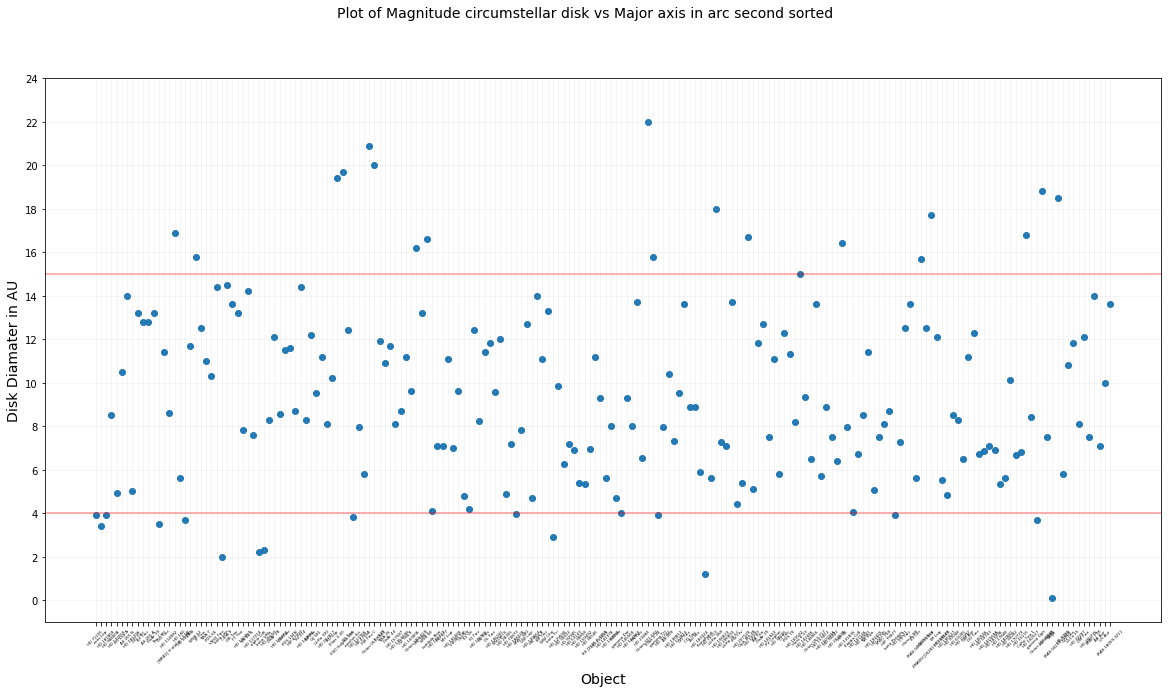

Length Array: 194


In [146]:
#is there a correlation between distance and magnitude Region of Interest?
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(cat_magnitude_diameter["Object"], cat_magnitude_diameter['R_band_mag'])

fig.suptitle('Plot of Magnitude circumstellar disk vs Major axis in arc second sorted', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
#bracket
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 25, step=2))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.savefig("test.png")

plt.show()

#print("Highest Magnitude: " + str( np.array( cat_magnitude_diameter["R_band_mag"])))
print("Length Array: " + str( len(np.array( cat_magnitude_diameter["R_band_mag"]))))

In [156]:
#which category had largest disk? Angular Size
disk_types = ["Debris", "TT", "UC", "YSO", "HAe", "Trans","YSO?", "PPN","HBe", "wTT"]



#for types in disk_types:
#    for index, row in data.iterrows(): 
        #if(row['Spec_Type'][0] == types)

Debris
TT
UC
YSO
HAe
Trans
YSO?
PPN
HBe
wTT


In [ ]:
#which category had largest disk? Physical Disk

In [176]:
sorted_objects

,Object,Category,Spec_Type,R_band_mag,Distance_pc,Disk_Major_Axis,Disk_Diameter_AU,Inclination_degrees,Resolution_elements_across,At_ref.wavelength_microns,RA_J2000,DEC_J2000
136,HD 71155,Debris,A0 V,3.9,37.5,0.100,3.8,30.0,0.4,10.40,05 35 14.05,-05 19 52.1
154,HT Lup B,NaN,NaN,NaN,154.0,0.032,5.0,45.0,0.9,1250.00,05 35 10.99,-05 30 35.2
252,zeta Lep,Debris,A0 V,3.4,21.6,0.280,6.0,30.0,0.2,18.30,22 57 39.05,-29 37 20.1
106,HD 181869,Debris,B8 V,3.9,55.7,0.160,8.9,80.0,0.6,10.40,04 35 33.0,+24 08 14
155,HT Lup C,NaN,NaN,NaN,154.0,0.059,9.0,66.0,1.7,1250.00,13 09 16.19,-60 18 30.1
142,HD 98800B,Trans,K5,8.5,50.0,0.250,12.0,67.0,0.3,880.00,05 35 47.34,-05 22 44.8
102,HD 172555,Debris,A5,4.93,29.2,0.540,16.0,47.0,1.2,18.00,05 35 19.13,-05 22 31.7
169,L1551 IRS 5,YSO,NaN,NaN,147.0,0.120,18.0,NaN,2.0,7000.00,05 43 51.41,-01 02 53.1
143,Hen 3-600A,TT,M4,NaN,50.0,0.400,20.0,36.0,0.4,880.00,16 27 39.01,-23 58 18.7
153,HT Lup A,TT,K2,10.5,154.0,0.156,24.0,48.0,4.5,1250.00,05 35 05.41,-05 27 17.2


In [ ]:
#conclusion:

In [193]:
category_size_arrange = pd.DataFrame(columns=['Object', 
                                                    'Categrory',
                                                    'Disk_Major_Axis',
                                                    'Disk_Diameter_AU']) #empty pandas array

In [194]:
for types in disk_types:
    for index, row in sorted_objects.iterrows(): 
           if(str(row[1]) == types):
            print(str(row[0]) + " " + str(row[1]) + " " + types)    
            category_size_arrange = category_size_arrange.append({
                'Object': row[0], 
                'Categrory': row[1],
                'Disk_Major_Axis' : float(row[5]),
                'Disk_Diameter_AU' : float(row[6])
            },ignore_index=True)

HD 71155 Debris Debris
zeta Lep Debris Debris
HD 181869 Debris Debris
HD 172555 Debris Debris
HD 181296 Debris Debris
Tau Ceti Debris Debris
HD 114082 Debris Debris
HD 166 Debris Debris
HD 20794 Debris Debris
TWA 7 Debris Debris
beta Leo Debris Debris
HD 117214 Debris Debris
alpha CrB Debris Debris
beta UMa Debris Debris
HD 35650 Debris Debris
HD 115600 Debris Debris
HIP 67497 Debris Debris
GJ 581 Debris Debris
HD 202917 Debris Debris
epsilon Eri Debris Debris
HD 113766 Debris Debris
HR 4796A Debris Debris
TWA 25 Debris Debris
HD 157587 Debris Debris
lambda Boo Debris Debris
HD 181327 Debris Debris
HD 377 Debris Debris
HD 191089 Debris Debris
rho Vir Debris Debris
61 Vir Debris Debris
HD 106906 Debris Debris
HD 146181 Debris Debris
HD 28355 Debris Debris
HD 74873 Debris Debris
HD 188228 Debris Debris
HD 139664 Debris Debris
beta Tri Debris Debris
HD 129590 Debris Debris
HD 30422 Debris Debris
HD 92945 Debris Debris
HD 53143 Debris Debris
HD 38858 Debris Debris
HD 159492 Debris Debris
H

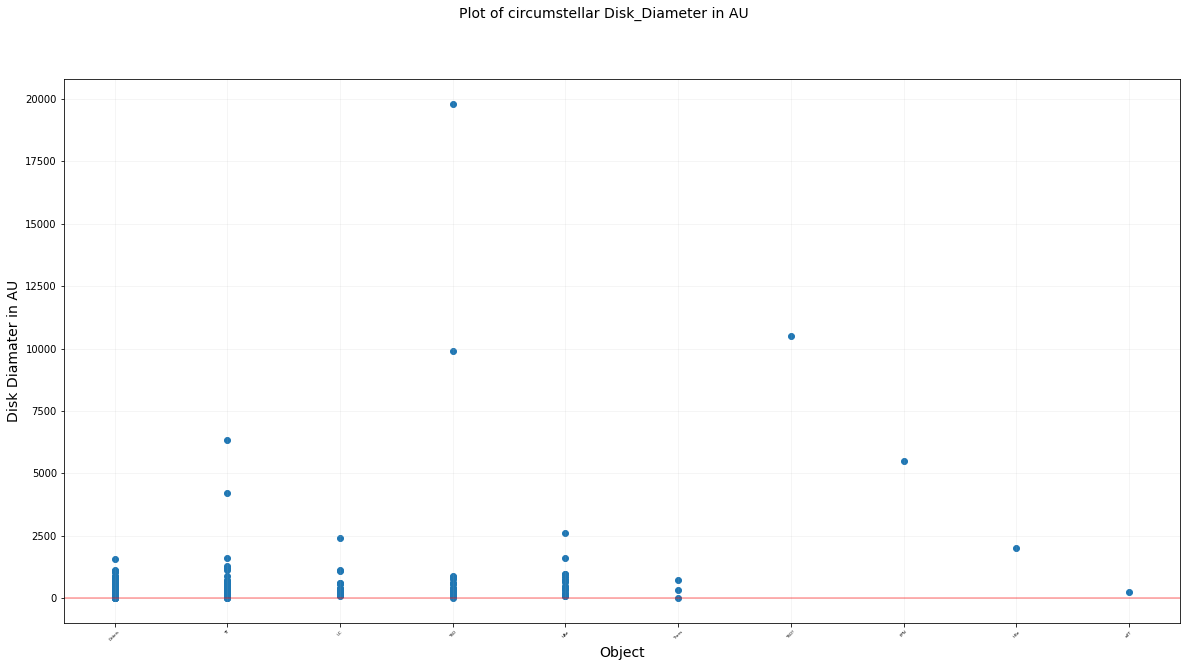

In [197]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(category_size_arrange["Categrory"], category_size_arrange["Disk_Diameter_AU"])

fig.suptitle('Plot of circumstellar Disk_Diameter in AU', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=0, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

#plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

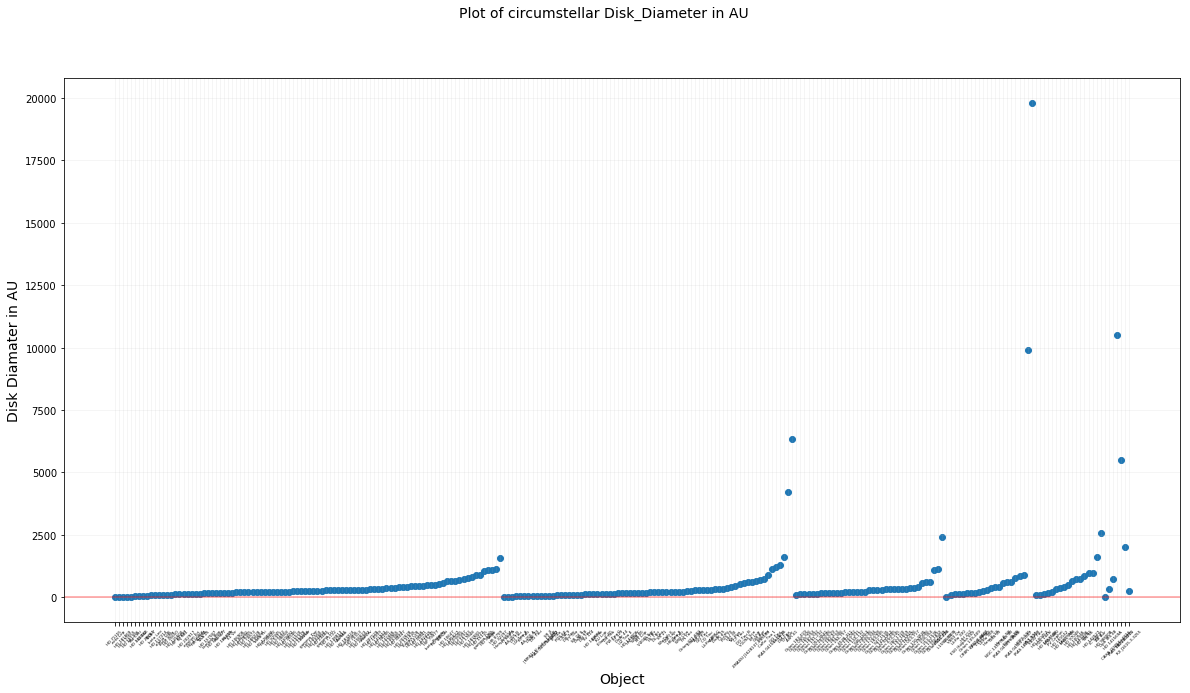

In [198]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(category_size_arrange["Object"], category_size_arrange["Disk_Diameter_AU"])

fig.suptitle('Plot of circumstellar Disk_Diameter in AU', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=0, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

#plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

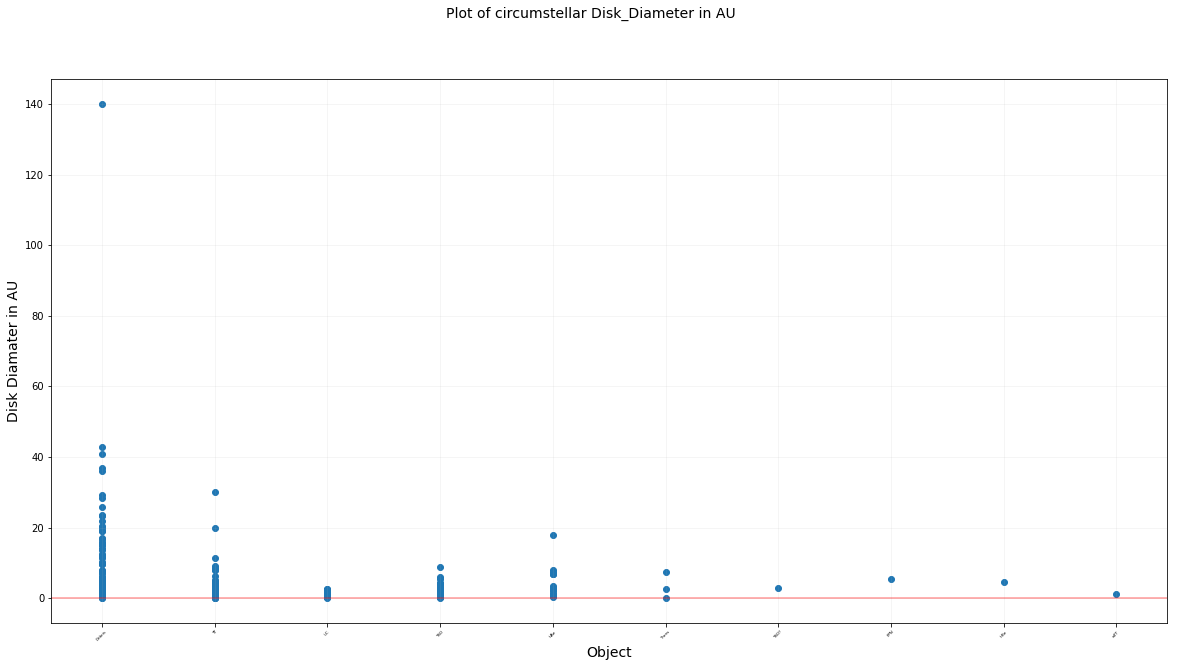

In [206]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(category_size_arrange["Categrory"], category_size_arrange["Disk_Major_Axis"])

fig.suptitle('Plot of circumstellar Disk_Diameter in AU', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=0, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

#plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

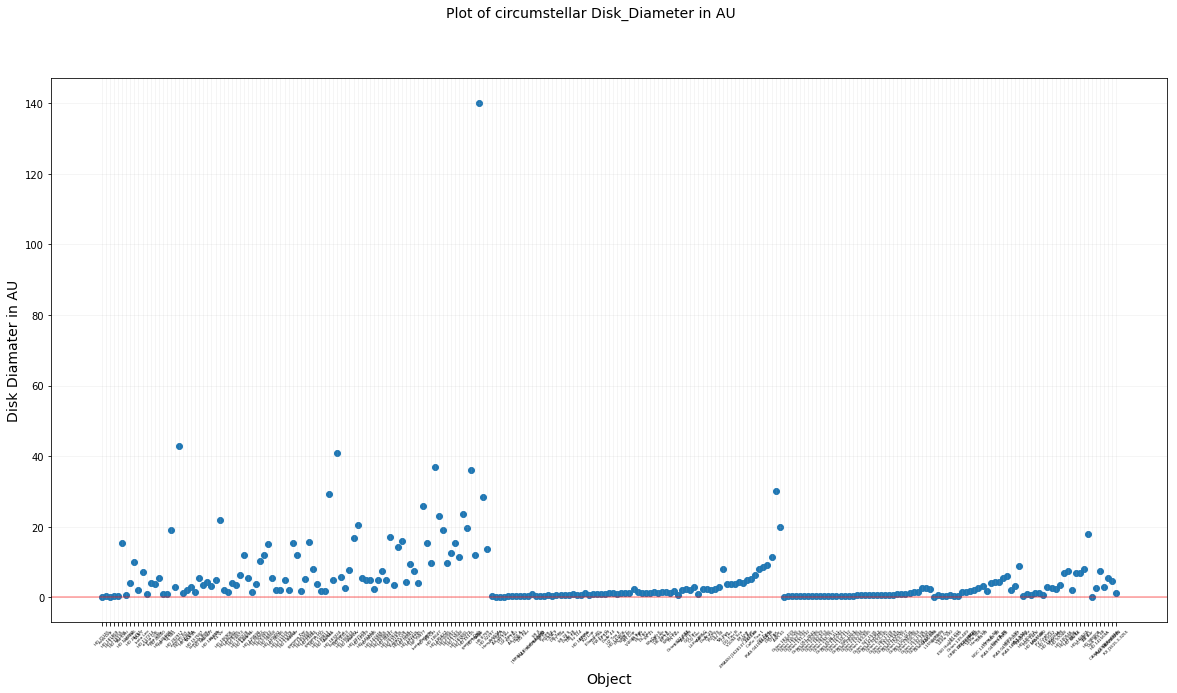

In [208]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(category_size_arrange["Object"], category_size_arrange["Disk_Major_Axis"])

fig.suptitle('Plot of circumstellar Disk_Diameter in AU', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=0, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

#plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()